In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [2]:
df = pd.read_csv("C:/Users/Prashik/OneDrive/Desktop/ml/Heart.csv")

In [7]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [13]:
df.shape

(303, 15)

In [16]:
# Handle Missing Values
df.dropna(inplace=True)

In [17]:
# Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
# Define Features and Target
X = df.drop("Age", axis=1)
Y = df["Chol"]


In [40]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Make Predictions
y_pred = model.predict(X_test)

In [44]:
import matplotlib.pyplot as plt

In [46]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.03
              precision    recall  f1-score   support

         141       0.00      0.00      0.00         1
         149       0.00      0.00      0.00         0
         157       0.00      0.00      0.00         0
         160       0.00      0.00      0.00         1
         164       0.00      0.00      0.00         1
         166       0.00      0.00      0.00         0
         175       0.00      0.00      0.00         1
         177       0.00      0.00      0.00         0
         182       0.00      0.00      0.00         0
         183       0.00      0.00      0.00         1
         184       0.00      0.00      0.00         1
         186       0.00      0.00      0.00         1
         187       0.00      0.00      0.00         0
         192       0.00      0.00      0.00         1
         193       0.00      0.00      0.00         1
         195       0.00      0.00      0.00         1
         197       1.00      1.00      1.00         1
         198

C:\Users\Prashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prashik\anaconda3\Lib\site-packag

In [47]:
# Train Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)


In [48]:
# Evaluate Regression Model
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.00


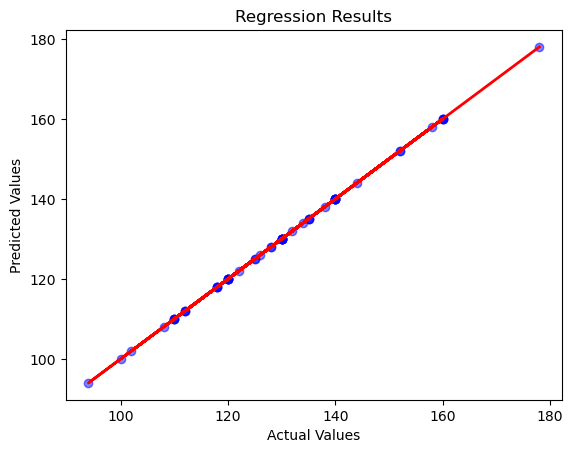

In [38]:
# Plot Regression Results
plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Ideal regression line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Results")
plt.show()